In [1]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

import polars as pl
import pandas as pd
pd.set_option('display.float_format', lambda x: f'{x :.1f}')
from cleaner import DataCleaner
import numpy as np
from datetime import datetime
from tools import (
    order_and_rename,
    import_datasets,
    bins_generator
)


In [2]:
movies = pd.read_csv('clean_datasets/movies_clean.csv')
ratings = pd.read_csv(
    'movies_datasets/title_ratings.tsv',
    sep = "\t",
)
joined = pd.merge(
    movies,
    ratings,
    left_on = "titre_id",
    right_on = "tconst"
)

In [3]:
joined = joined.rename(
    columns={
        "averageRating" : "rating_avg",
        "numVotes" : "rating_votes"
    }
).drop("tconst", axis=1)

rating = joined

In [4]:
bins, names = bins_generator(rating["titre_date_sortie"].max())

rating["cuts"] = pd.cut(
    rating["titre_date_sortie"],
    bins=bins,
    labels=names
)

In [5]:
nodup = rating[~rating["titre_str"].duplicated(keep="first")]

In [6]:
nodup["rating_avg"].median()

6.3

In [7]:
nodup["rating_avg"].describe()

count   250676.0
mean         6.2
std          1.4
min          1.0
25%          5.4
50%          6.3
75%          7.1
max         10.0
Name: rating_avg, dtype: float64

In [8]:
condi = (
    nodup["rating_avg"] == 10
)

best_movies = nodup[condi]

best_movies

,titre_id,titre_str,titre_type,titre_date_sortie,titre_date_fin,titre_duree,titre_genres,person_id,person_name,person_birthdate,person_job,person_role,person_index,rating_avg,rating_votes,cuts
1311947,tt10449358,Kaputol,movie,2019,0,120,Drama,nm2921912,Popo Diaz,0,production_designer,0,10,10.0,7,2010-2020
1313085,tt10463270,Shouting Silence,movie,2021,0,95,"Crime,Drama,Thriller",nm12297451,Samir Singh,0,actor,"[""Tushar""]",10,10.0,18,2010-2020
1327089,tt10663998,Widow of the Revolution: The Anna Larina Story,movie,2000,0,0,Documentary,nm8529806,Stephen F. Cohen,0,actor,"[""Narrator & Correspondent""]",1,10.0,25,1990-2000
1329972,tt10703554,The Book of Harth,movie,2022,0,62,Documentary,nm4495779,Timothy John Foster,0,cinematographer,0,10,10.0,8,>2021
1344561,tt10925174,Petersburg's tram,movie,2007,0,74,"Documentary,History",nm7409140,Sergey Stepanov,0,self,"[""Self - Host""]",1,10.0,27,2000-2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2434689,tt8070536,Dirt Merchants: Rebelistic,movie,2018,0,95,Drama,nm4352839,Drew Lane,0,composer,0,10,10.0,7,2010-2020
2443030,tt8215820,Are We Making a Film? Behind the Scenes: Follo...,movie,2018,0,67,Documentary,nm8332521,Adam William Cahill,1986,self,"[""Self""]",1,10.0,8,2010-2020
2465969,tt8649490,The Imaginary State,movie,2020,0,105,"Drama,Thriller",nm0592164,Miguel Miranda,0,composer,0,10,10.0,7,2010-2020
2483251,tt8974670,Major Capers: The Legend of Team Broadminded,movie,2022,0,88,Documentary,nm0589719,Michael Millikan,0,cinematographer,0,10,10.0,6,>2021


In [9]:
for date in names[1:]:
    condi = (
        (nodup["cuts"] == date)
    )
    print(f"Average note for {date}, {nodup['rating_avg'][condi].median()}")

Average note for 1900-1910, 4.7
Average note for 1910-1920, 6.0
Average note for 1920-1930, 6.2
Average note for 1930-1940, 6.1
Average note for 1940-1950, 6.3
Average note for 1950-1960, 6.3
Average note for 1960-1970, 6.2
Average note for 1970-1980, 6.1
Average note for 1980-1990, 6.1
Average note for 1990-2000, 6.2
Average note for 2000-2010, 6.4
Average note for 2010-2020, 6.4
Average note for >2021, 6.7


In [10]:
# condi = nodup["rating_avg"] > nodup["rating_avg"].median()

# nodup["titre_genres"][condi].mode()

In [11]:
# films avec note au dessus de la moyenne et nb de vote > au 3e quartile
condi = (
    (nodup["rating_avg"] > nodup["rating_avg"].median()) &
    (nodup["rating_votes"] > 413)
)
nodup[condi].reset_index(drop='index')

,titre_id,titre_str,titre_type,titre_date_sortie,titre_date_fin,titre_duree,titre_genres,person_id,person_name,person_birthdate,person_job,person_role,person_index,rating_avg,rating_votes,cuts
0,tt0002130,Dante's Inferno,movie,1911,0,71,"Adventure,Drama,Fantasy",nm1376180,Sandro Properzi,0,production_designer,0,10,7.0,3267,1900-1910
1,tt0002423,Passion,movie,1919,0,85,"Biography,Drama,Romance",nm0913298,Kurt Waschneck,1882,cinematographer,0,10,6.6,968,1910-1920
2,tt0002646,Atlantis,movie,1913,0,121,Drama,nm0004592,Robert Israel,1963,composer,0,10,6.5,459,1910-1920
3,tt0002844,Fantômas: In the Shadow of the Guillotine,movie,1913,0,54,"Crime,Drama",nm1666136,Georges Guérin,0,cinematographer,0,10,6.9,2426,1910-1920
4,tt0003014,Ingeborg Holm,movie,1913,0,96,Drama,nm0526234,Richard Lund,1885,actor,"[""Doctor at Poorhouse""]",10,7.0,1368,1910-1920
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26512,tt9900782,Kaithi,movie,2019,0,145,"Action,Adventure,Crime",nm4237148,Sam C.S.,0,composer,0,10,8.4,38145,2010-2020
26513,tt9902160,Herself,movie,2020,0,97,Drama,nm2570742,Natalie Holt,0,composer,0,10,7.0,4436,2010-2020
26514,tt9904844,Ott Tänak: The Movie,movie,2019,0,125,"Documentary,Sport",nm2761473,Margus Malm,0,cinematographer,0,10,8.1,498,2010-2020
26515,tt9905462,Pengalila,movie,2019,0,111,Drama,nm4143605,V.T. Sreejith,0,editor,0,10,7.6,679,2010-2020


Avg rating par genre, avg rating par acteur, avg par director, correlation entre durée et note?

In [12]:
# avg rating par director
# rajouter le nb de film a coté

condi = rating[rating["person_job"] == "director"]

director_avg = condi.groupby('person_name')["rating_avg"].mean().reset_index()

director_avg = director_avg.sort_values(by="rating_avg", ascending=False)

director_avg

,person_name,rating_avg
729,Abraham Escobedo Salas,10.0
77792,Nancy Pop,10.0
101972,Stephen Adetumbi,10.0
17846,Charley Voorhis,10.0
28150,Drayon Blackett,10.0
...,...,...
45146,Jack Wells,1.0
115261,Yunsu Kim,1.0
59210,Kenta Matsuo,1.0
75456,Mikio Ohkado,1.0


In [13]:
# avg par acteur
# rajouter le nb de film a coté

condi = rating[rating["person_job"].str.contains("act")]

actor_avg = condi.groupby('person_name')["rating_avg"].mean().reset_index()

actor_avg = actor_avg.sort_values(by="rating_avg", ascending=False)

actor_avg

,person_name,rating_avg
314681,Ruchika Bhatia,10.0
32763,Arne Pelto,10.0
234309,Marilyn Bevans,10.0
109185,Esme Grey Moffat,10.0
251173,Michael Rooney,10.0
...,...,...
96773,Dyler,1.0
6037,Aida Fuentes Concheso,1.0
65724,Chisato Hashimoto,1.0
13416,Alfred Kjøge,1.0


c:\Users\morga\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\morga\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='titre_duree', ylabel='rating_avg'>

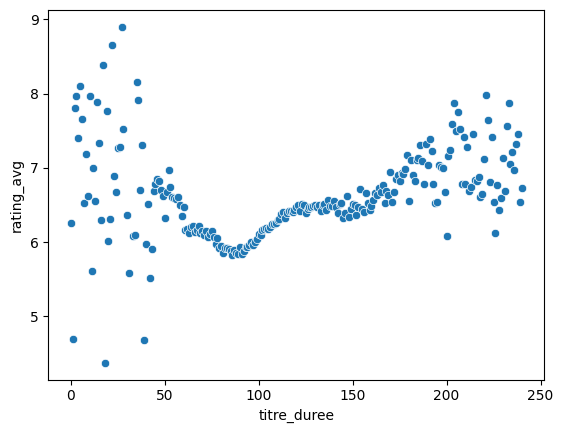

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

condi = rating[rating["titre_duree"] <= 240]

duration_avg_rating = condi.groupby('titre_duree')['rating_avg'].mean().reset_index()

correlation = duration_avg_rating['titre_duree'].corr(duration_avg_rating['rating_avg'])

sns.scatterplot(x='titre_duree', y='rating_avg', data=duration_avg_rating)